
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/data-science-workshop-2022/blob/main/40--spark/99--analysis.ipynb)

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz -O spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [1]:
!pip install -q pyspark 

In [33]:
pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 23.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 7.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_10_9_x86_64.whl (65 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

* https://spark.apache.org/docs/latest/sql-programming-guide.html
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Spark dataframe")\
        .getOrCreate()

In [14]:
spark

https://spark.apache.org/docs/latest/sql-data-sources-load-save-functions.html

In [4]:
!mkdir -p var
!wget -c https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv -O var/otomoto.csv

--2023-01-20 22:37:31--  https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.170.193
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.170.193|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [15]:
DF = spark.read.load("var/otomoto.csv", format="csv", sep=";", inferSchema="true", header="true")

In [16]:
DF.createOrReplaceTempView("cars")

In [17]:
all_cars = spark.sql("""
    Select przebieg from cars
""")

In [18]:
type(all_cars)

pyspark.sql.dataframe.DataFrame

* https://spark.apache.org/docs/latest/sql-programming-guide.html
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

In [21]:
from pyspark.sql.functions import *

In [22]:
CARS = DF.select('id','Marka pojazdu', "Model pojazdu", "przebieg", "price", "rok produkcji")
CARS = CARS.dropna()
CARS = CARS.withColumn("przebieg", regexp_replace(CARS['przebieg'], '\s', ''))
CARS = CARS.withColumn("przebieg", regexp_replace(CARS['przebieg'], 'km', ''))
CARS = CARS.withColumn("przebieg", CARS['przebieg'].cast('int'))


In [23]:
CARS.take(10)

[Row(id=6039269187, Marka pojazdu='Renault', Model pojazdu='Fluence', przebieg=172000, price=25900.0, rok produkcji=2013),
 Row(id=6034090022, Marka pojazdu='Mercedes-Benz', Model pojazdu='Klasa G', przebieg=52904, price=434900.0, rok produkcji=2016),
 Row(id=6039268812, Marka pojazdu='Audi', Model pojazdu='A5', przebieg=56000, price=41900.0, rok produkcji=2011),
 Row(id=6039269107, Marka pojazdu='Volkswagen', Model pojazdu='Polo', przebieg=88000, price=14900.0, rok produkcji=2007),
 Row(id=6038674457, Marka pojazdu='Peugeot', Model pojazdu='206 CC', przebieg=176000, price=5900.0, rok produkcji=2001),
 Row(id=6033752462, Marka pojazdu='Volkswagen', Model pojazdu='Bora', przebieg=300000, price=7900.0, rok produkcji=2003),
 Row(id=6035637917, Marka pojazdu='BMW', Model pojazdu='Seria 5', przebieg=301000, price=9800.0, rok produkcji=2002),
 Row(id=6038678372, Marka pojazdu='Audi', Model pojazdu='Q5', przebieg=155400, price=98900.0, rok produkcji=2013),
 Row(id=6039268967, Marka pojazdu='H

In [24]:
CARS.show()

+----------+-------------+--------------+--------+--------+-------------+
|        id|Marka pojazdu| Model pojazdu|przebieg|   price|rok produkcji|
+----------+-------------+--------------+--------+--------+-------------+
|6039269187|      Renault|       Fluence|  172000| 25900.0|         2013|
|6034090022|Mercedes-Benz|       Klasa G|   52904|434900.0|         2016|
|6039268812|         Audi|            A5|   56000| 41900.0|         2011|
|6039269107|   Volkswagen|          Polo|   88000| 14900.0|         2007|
|6038674457|      Peugeot|        206 CC|  176000|  5900.0|         2001|
|6033752462|   Volkswagen|          Bora|  300000|  7900.0|         2003|
|6035637917|          BMW|       Seria 5|  301000|  9800.0|         2002|
|6038678372|         Audi|            Q5|  155400| 98900.0|         2013|
|6039268967|      Hyundai|      Santa Fe|  124500| 14480.0|         2004|
|6039268802|   Volkswagen|          Golf|   95100| 64900.0|         2014|
|6039266742|         Jeep|Grand Cherok

In [25]:
CARS.printSchema()

root
 |-- id: long (nullable = true)
 |-- Marka pojazdu: string (nullable = true)
 |-- Model pojazdu: string (nullable = true)
 |-- przebieg: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- rok produkcji: integer (nullable = true)



In [26]:
from pyspark.sql.functions import udf
udf?

In [27]:
lowercase_name = udf(lambda x: x.lower(), "string")

In [28]:
CARS = CARS.withColumn("Marka pojazdu", lowercase_name(CARS["Marka pojazdu"]))
CARS = CARS.withColumn("Model pojazdu", lowercase_name(CARS["Model pojazdu"]))

In [29]:
CARS = CARS.withColumnRenamed("Marka pojazdu", 'marka') \
    .withColumnRenamed("Model pojazdu", 'model') \
    .withColumnRenamed("rok produkcji", 'rok')

In [55]:
CARS.createOrReplaceTempView("cars")

In [56]:
CARS.take(10)

[Row(id=6039269187, marka='renault', model='fluence', przebieg=172000, price=25900.0, rok=2013),
 Row(id=6034090022, marka='mercedes-benz', model='klasa g', przebieg=52904, price=434900.0, rok=2016),
 Row(id=6039268812, marka='audi', model='a5', przebieg=56000, price=41900.0, rok=2011),
 Row(id=6039269107, marka='volkswagen', model='polo', przebieg=88000, price=14900.0, rok=2007),
 Row(id=6038674457, marka='peugeot', model='206 cc', przebieg=176000, price=5900.0, rok=2001),
 Row(id=6033752462, marka='volkswagen', model='bora', przebieg=300000, price=7900.0, rok=2003),
 Row(id=6035637917, marka='bmw', model='seria 5', przebieg=301000, price=9800.0, rok=2002),
 Row(id=6038678372, marka='audi', model='q5', przebieg=155400, price=98900.0, rok=2013),
 Row(id=6039268967, marka='hyundai', model='santa fe', przebieg=124500, price=14480.0, rok=2004),
 Row(id=6039268802, marka='volkswagen', model='golf', przebieg=95100, price=64900.0, rok=2014)]

In [57]:
price_millage = CARS.select("rok", "przebieg").toPandas()

<AxesSubplot: >

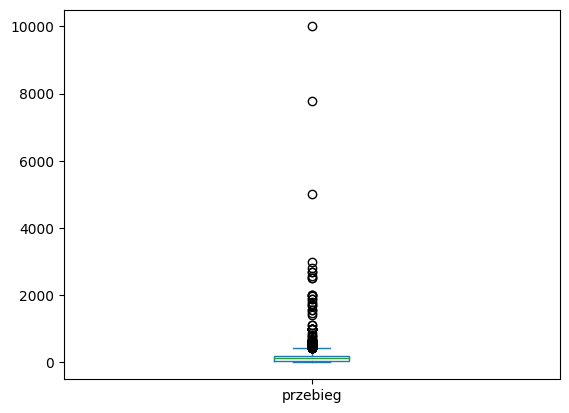

In [70]:
import matplotlib as plt
plt.style.use('default')

(price_millage['przebieg']/1000).plot.box()

In [71]:
import seaborn as sns
sns.set()

<AxesSubplot: >

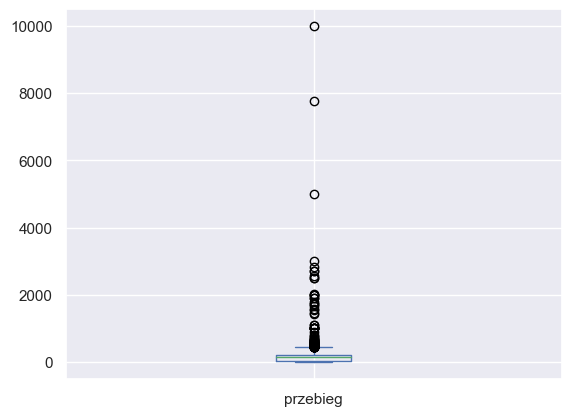

In [72]:
(price_millage['przebieg']/1000).plot.box()

In [73]:
years = CARS.select("rok").toPandas()

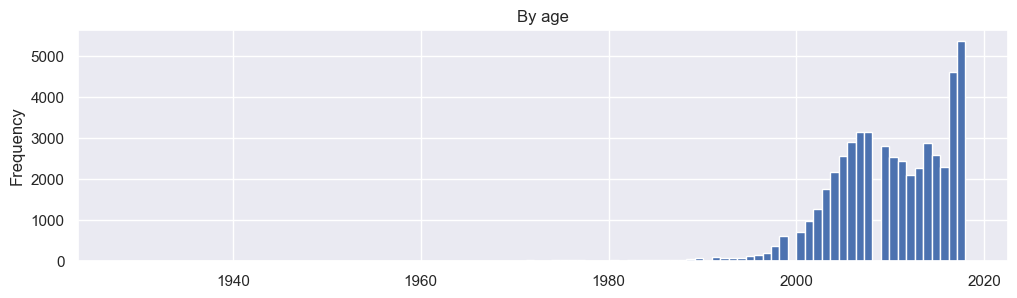

In [74]:
plt.rcParams["figure.figsize"] = (12,3)
ax = (years['rok'].sort_values()
    .plot(kind='hist', bins = 100, title="By age"))

In [83]:
spark.sql('''
    select marka, count(*) as n from cars group by marka order by n DESC
''').show()

+-------------+----+
|        marka|   n|
+-------------+----+
|   volkswagen|5574|
|         opel|4357|
|          bmw|4254|
|         audi|3979|
|         ford|3643|
|mercedes-benz|3070|
|      renault|2681|
|       toyota|2525|
|        škoda|2366|
|      peugeot|1906|
|      citroën|1675|
|         seat|1337|
|        volvo|1274|
|      hyundai|1267|
|         fiat|1260|
|       nissan|1178|
|          kia|1061|
|        mazda|1018|
|        honda| 812|
|       suzuki| 585|
+-------------+----+
only showing top 20 rows



In [84]:
by_brand = CARS.select("marka").groupBy("marka").count().toPandas()

In [85]:
type(by_brand)

pandas.core.frame.DataFrame

In [86]:
len(by_brand)

87

In [87]:
CARS.count()

50610

In [88]:
CARS_S = CARS.sample(True, 0.1)

In [89]:
CARS_S.count()

5128

<AxesSubplot: title={'center': 'Liczebnosc'}, ylabel='marka'>

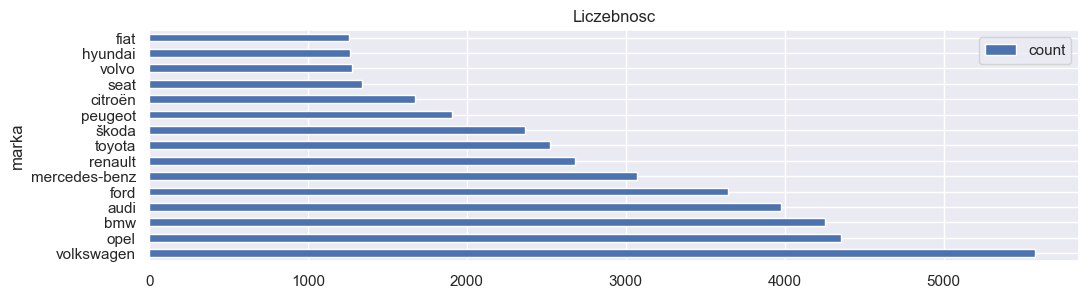

In [91]:
by_brand.index = by_brand['marka']
by_brand.sort_values(by='count', ascending=False)[:15].plot.barh(title="Liczebnosc")

In [92]:
przebieg_data = CARS.select('przebieg').toPandas()

In [93]:
przebieg_data['przebieg'] = przebieg_data['przebieg'] / 1000

In [94]:
przebieg_data.describe()

,przebieg
count,50610.000000
mean,134.374310
std,119.935487
min,0.001000
25%,39.763250
50%,143.000000
75%,200.000000
max,9999.999000


In [117]:
from pandas import pandas as pd

In [120]:
pd.options.display.float_format = '{:.2f}'.format

In [122]:
spark.sql('''
    select
        std(przebieg),
        min(przebieg),
        max(przebieg),
        avg(przebieg),
        percentile(przebieg, 0.5),
        percentile(przebieg, 0.9),
        percentile(przebieg, 0.95),
        percentile(przebieg, 0.99)
    from cars
''').toPandas().transpose()

,0
std(przebieg),119935.49
min(przebieg),1.00
max(przebieg),9999999.00
avg(przebieg),134374.31
"percentile(przebieg, 0.5, 1)",143000.00
"percentile(przebieg, 0.9, 1)",250003.40
"percentile(przebieg, 0.95, 1)",283000.00
"percentile(przebieg, 0.99, 1)",351000.00


In [123]:
przebieg_data = przebieg_data[przebieg_data['przebieg'] < 500]

In [126]:
CARS.describe().show()

+-------+-------------------+------+------------------+------------------+-----------------+------------------+
|summary|                 id| marka|             model|          przebieg|            price|               rok|
+-------+-------------------+------+------------------+------------------+-----------------+------------------+
|  count|              50610| 50610|             50610|             50610|            50610|             50610|
|   mean|6.030374536484549E9|  null| 548.4491451558833| 134374.3101956135|56948.32642422444|2010.0029045643153|
| stddev|6.447759693722554E7|  null|1058.1090595094647|119935.48674770644|84475.62848820249| 6.260554443478208|
|    min|         4019793506|abarth|               1.3|                 1|            500.0|              1928|
|    max|         6039269562|   żuk|                zx|           9999999|        4750000.0|              2018|
+-------+-------------------+------+------------------+------------------+-----------------+------------

In [134]:
CARS.where('przebieg < 500000').describe('przebieg').show()

+-------+------------------+
|summary|          przebieg|
+-------+------------------+
|  count|             50541|
|   mean|132634.06841969886|
| stddev| 94311.72695041612|
|    min|                 1|
|    max|            499011|
+-------+------------------+



In [135]:
przebieg_data.describe()

,przebieg
count,50541.00
mean,132.63
std,94.31
min,0.00
25%,39.46
50%,142.64
75%,200.00
max,499.01


In [136]:
przebieg_data['przebieg']

0       172.00
1        52.90
2        56.00
3        88.00
4       176.00
         ...  
50605   230.00
50606   160.70
50607   128.49
50608     0.01
50609   139.00
Name: przebieg, Length: 50541, dtype: float64

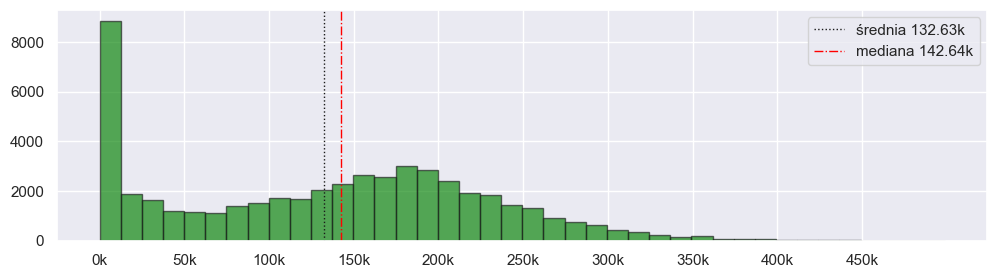

In [139]:
import matplotlib.pyplot as plt
import numpy as np
plt_data = przebieg_data['przebieg']
H, xedges, yedges = plt.hist(plt_data, bins=40, color='green', edgecolor='k', alpha=0.65)

av_line = plt.axvline(plt_data.mean(), color='k', linestyle=':', linewidth=1)
med_line = plt.axvline(plt_data.median(), color='red', linestyle='-.', linewidth=1)

plt.legend([av_line, med_line], ["średnia {0:.2f}k".format(plt_data.mean()), "mediana {0:.2f}k".format(plt_data.median())])

xlabels = map(lambda x: "{}k".format(int(x/1000)) ,np.arange(0, 500000, 50000))
plt.xticks(np.arange(0, 500000, 50000)/1000, xlabels)
plt.title = "przebieg / liczebność"
plt.show()


In [140]:
top_marki = CARS.select("marka").groupBy("marka").count()\
    .sort("count", ascending=False)\
    .limit(12) \
    .collect()

In [141]:
top_marki = [row.marka for row in top_marki]

In [152]:
top_marki

['volkswagen',
 'opel',
 'bmw',
 'audi',
 'ford',
 'mercedes-benz',
 'renault',
 'toyota',
 'škoda',
 'peugeot',
 'citroën',
 'seat']

In [153]:
CARS = CARS.withColumn('przebieg_k', CARS['przebieg'] / 1000)

In [155]:
CARS.show(5)

+----------+-------------+-------+--------+--------+----+----------+
|        id|        marka|  model|przebieg|   price| rok|przebieg_k|
+----------+-------------+-------+--------+--------+----+----------+
|6039269187|      renault|fluence|  172000| 25900.0|2013|     172.0|
|6034090022|mercedes-benz|klasa g|   52904|434900.0|2016|    52.904|
|6039268812|         audi|     a5|   56000| 41900.0|2011|      56.0|
|6039269107|   volkswagen|   polo|   88000| 14900.0|2007|      88.0|
|6038674457|      peugeot| 206 cc|  176000|  5900.0|2001|     176.0|
+----------+-------------+-------+--------+--------+----+----------+
only showing top 5 rows



In [156]:
CARS.take(5)

[Row(id=6039269187, marka='renault', model='fluence', przebieg=172000, price=25900.0, rok=2013, przebieg_k=172.0),
 Row(id=6034090022, marka='mercedes-benz', model='klasa g', przebieg=52904, price=434900.0, rok=2016, przebieg_k=52.904),
 Row(id=6039268812, marka='audi', model='a5', przebieg=56000, price=41900.0, rok=2011, przebieg_k=56.0),
 Row(id=6039269107, marka='volkswagen', model='polo', przebieg=88000, price=14900.0, rok=2007, przebieg_k=88.0),
 Row(id=6038674457, marka='peugeot', model='206 cc', przebieg=176000, price=5900.0, rok=2001, przebieg_k=176.0)]

In [169]:
spark.sql('''
    select explode(sequence(0,500)) as przebieg,
    0 as n
''').createOrReplaceTempView('przebieg_x')

In [171]:
spark.sql('''
    select 
        round(przebieg/1000, 0) przebieg_k,
        count(*) as n,
        marka 
    from cars
    where 
    przebieg <= 500000
    group by przebieg_k, marka
''').createOrReplaceTempView('przebieg_marka_n')

In [176]:
spark.sql('''
    select x.przebieg, mn.n, mn.marka 
    from przebieg_x x
    LEFT JOIN przebieg_marka_n mn on x.przebieg = mn.przebieg_k
    where mn.marka = "renault"
    order by x.przebieg ASC
''').show(5)

+--------+---+-------+
|przebieg|  n|  marka|
+--------+---+-------+
|       0|277|renault|
|       1|  5|renault|
|       2|  9|renault|
|       3|  5|renault|
|       4|  6|renault|
+--------+---+-------+
only showing top 5 rows



In [290]:
przebiegByMarka = spark.sql('''
    select x.przebieg, mn.n, mn.marka 
    from przebieg_x x
    LEFT JOIN przebieg_marka_n mn on x.przebieg = mn.przebieg_k
    where mn.przebieg_k < 350
    order by x.przebieg ASC
''')

In [291]:
przebiegByMarka.where(przebiegByMarka['marka'] == 'renault').show(5)

+--------+---+-------+
|przebieg|  n|  marka|
+--------+---+-------+
|       0|277|renault|
|       1|  5|renault|
|       2|  9|renault|
|       3|  5|renault|
|       4|  6|renault|
+--------+---+-------+
only showing top 5 rows



In [292]:
przebieg_descriptions = spark.sql('''
    select 
        cast(marka as string) marka,
        avg(round(przebieg/1000, 0)) as avg,
        percentile(round(przebieg/1000, 0), 0.5) as med
    from cars 
    group by marka
''').toPandas()

In [293]:
example = przebiegByMarka.where(przebiegByMarka['marka'] == 'renault').toPandas()
details = przebieg_descriptions[przebieg_descriptions['marka'] == 'renault'].iloc[0]

In [294]:
details

marka    renault
avg       136.45
med       149.00
Name: 75, dtype: object

In [295]:
example

,przebieg,n,marka
0,0,277,renault
1,1,5,renault
2,2,9,renault
3,3,5,renault
4,4,6,renault
...,...,...,...
319,337,1,renault
320,340,3,renault
321,344,1,renault
322,345,1,renault


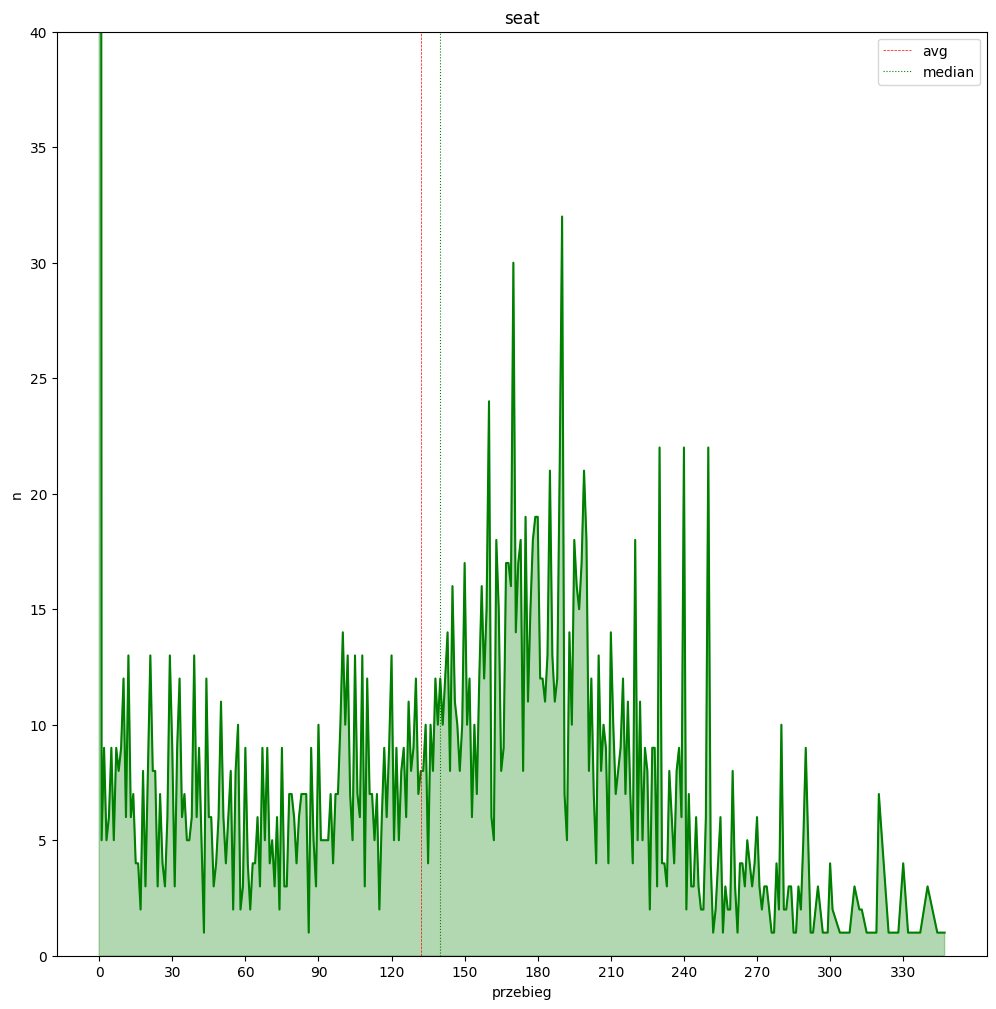

In [302]:
plt.rcParams["figure.figsize"] = (12,12)

p = sns.lineplot(data=example, x="przebieg", y="n", color='green')
p.set_xticks(range(0,350, 30))
p.set_ylim(0, 40)
p.axvline(x=details.avg, color='red', label='avg', ls="--", lw=0.5)
p.axvline(x=details.med, color='green', label='median', ls=":", lw=0.8)
p.legend()
p.set_title(details.marka)
p.fill_between(example.przebieg, example.n, alpha=0.3, color="green")

plt.show()


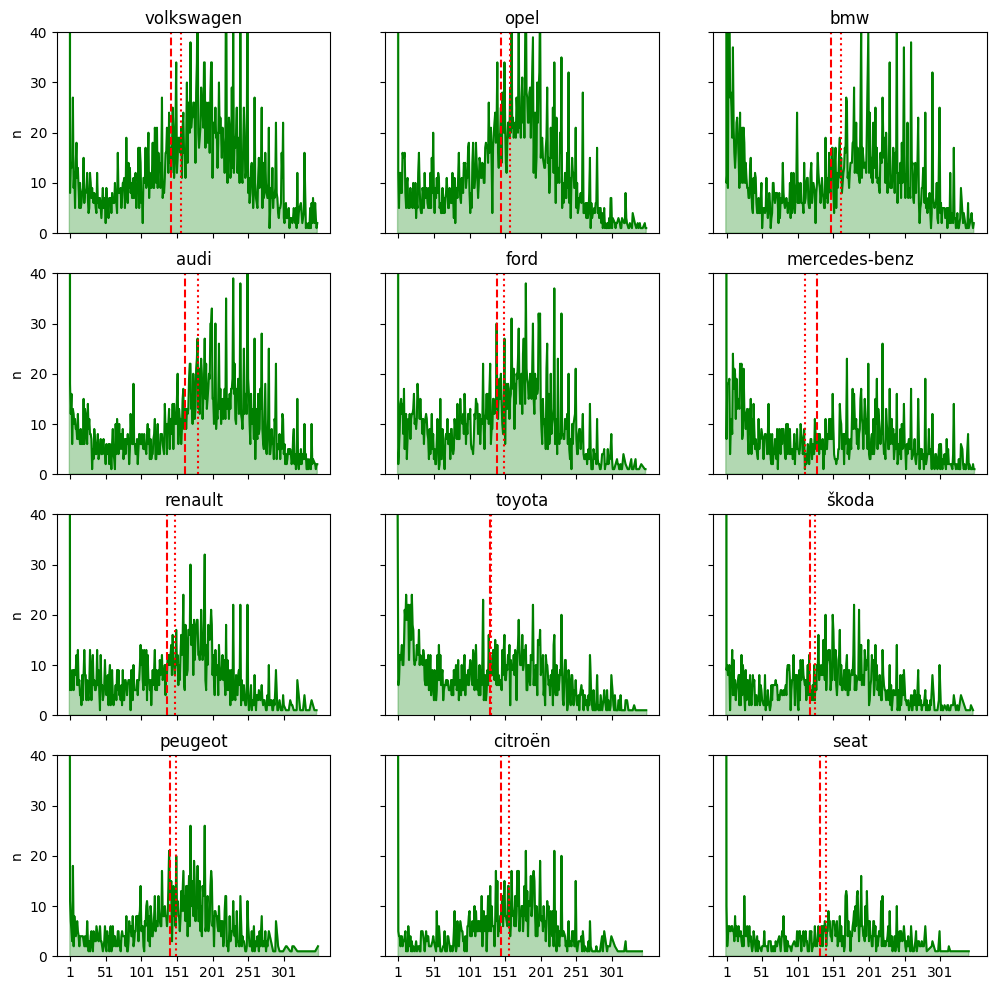

In [304]:
from random import randint
from itertools import chain
import matplotlib as mplt
import matplotlib.pyplot as plt
mplt.style.use('default')

plt.rcParams["figure.figsize"] = (12,12)

f, axs = plt.subplots(4,3, sharex=True, sharey=True)

charts = zip(top_marki, chain.from_iterable(axs))

def draw_chart(data, details, chart):
    p = sns.lineplot(data=data, x="przebieg", y="n", ax=chart, color='green')
    p.set_xticks(range(1,350, 50))
    p.set_ylim(0, 40)
    p.axvline(x=details.avg, color='red', label='millage avg', ls="--", lw=1.5)
    p.axvline(x=details.med, color='red', label='millage median', ls=":", lw=1.5)
    #p.legend()
    p.set_title(details.marka)
    p.set(xlabel=None)
    p.fill_between(data.przebieg, data.n, alpha=0.3, color="green")

for marka, chart in charts:
    data = przebiegByMarka.where(przebiegByMarka['marka'] == marka).toPandas()
    details = przebieg_descriptions[przebieg_descriptions['marka'] == marka].iloc[0]
    
    draw_chart(data, details, chart)

plt.show()

In [305]:
przebieg_descriptions

,marka,avg,med
0,citroën,145.63,156.00
1,jaguar,90.51,69.00
2,ligier,26.09,25.00
3,buick,164.33,182.00
4,land rover,109.34,92.00
...,...,...,...
82,volvo,143.23,156.00
83,uaz,16.50,4.00
84,abarth,7.00,7.00
85,aixam,28.41,29.00


In [307]:
spark.sql('''
    select 
        cast(marka as string) marka,
        avg(round(przebieg/1000, 0)) as avg,
        percentile(round(przebieg/1000, 0), 0.5) as med
    from cars 
    group by marka
''').show()

+-----------+------------------+-----+
|      marka|               avg|  med|
+-----------+------------------+-----+
|    citroën|145.63164179104479|156.0|
|     jaguar| 90.50697674418605| 69.0|
|     ligier| 26.09090909090909| 25.0|
|      buick|164.33333333333334|182.0|
| land rover|109.34251968503936| 92.0|
|   daihatsu|177.66666666666666|148.5|
|     morgan|              14.0| 14.0|
|     hummer| 105.0909090909091|112.0|
|       tata|              74.0| 74.0|
|    mclaren|             24.75| 11.0|
|        żuk|               1.0|  1.0|
|autobianchi|              64.0| 64.0|
| mitsubishi|125.68105065666042|139.0|
|    pontiac| 97.14285714285714|109.0|
|      lexus| 100.6547619047619| 75.5|
|       lada| 83.33333333333333| 85.0|
|     toyota| 129.5790099009901|131.0|
|       seat|131.94614809274495|140.0|
|       saab| 214.7753623188406|220.0|
|    peugeot|140.96642182581323|150.0|
+-----------+------------------+-----+
only showing top 20 rows



In [308]:
spark.sql('''
    select 
        marka,
        avg(round(przebieg/1000, 0)) as avg,
        percentile(round(przebieg/1000, 0), 0.5) as med
    from cars 
    group by marka
''').show()

+-----------+------------------+-----+
|      marka|               avg|  med|
+-----------+------------------+-----+
|    citroën|145.63164179104479|156.0|
|     jaguar| 90.50697674418605| 69.0|
|     ligier| 26.09090909090909| 25.0|
|      buick|164.33333333333334|182.0|
| land rover|109.34251968503936| 92.0|
|   daihatsu|177.66666666666666|148.5|
|     morgan|              14.0| 14.0|
|     hummer| 105.0909090909091|112.0|
|       tata|              74.0| 74.0|
|    mclaren|             24.75| 11.0|
|        żuk|               1.0|  1.0|
|autobianchi|              64.0| 64.0|
| mitsubishi|125.68105065666042|139.0|
|    pontiac| 97.14285714285714|109.0|
|      lexus| 100.6547619047619| 75.5|
|       lada| 83.33333333333333| 85.0|
|     toyota| 129.5790099009901|131.0|
|       seat|131.94614809274495|140.0|
|       saab| 214.7753623188406|220.0|
|    peugeot|140.96642182581323|150.0|
+-----------+------------------+-----+
only showing top 20 rows



In [318]:
spark.sql('''
    select 
        marka,
        model,
        avg(przebieg/1000) over (partition by marka, model) as avg_millage
    from cars 
''').show()

+------+-----+------------------+
| marka|model|       avg_millage|
+------+-----+------------------+
|abarth|  595|              6.54|
|abarth|  595|              6.54|
| acura|  mdx|             155.0|
| aixam| a721|          49.86575|
| aixam| a721|          49.86575|
| aixam| a721|          49.86575|
| aixam| a721|          49.86575|
| aixam| a741|              48.5|
| aixam| a741|              48.5|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
| aixam| city|12.211545454545456|
+------+-----+------------------+
only showing top 20 rows



In [336]:
spark.sql('''
    select 
        marka,
        model,
        count(*) n,
        rank() over (partition by marka order by count(*) DESC) as internal_rank
    from cars 
    where marka = "volvo"
    group by marka, model
''').show()



+-----+---------+---+-------------+
|marka|    model|  n|internal_rank|
+-----+---------+---+-------------+
|volvo|    xc 60|219|            1|
|volvo|      v40|151|            2|
|volvo|      v50|147|            3|
|volvo|      s60|130|            4|
|volvo|    xc 90|116|            5|
|volvo|      v60|112|            6|
|volvo|      v70| 74|            7|
|volvo|      s40| 73|            8|
|volvo|      s80| 59|            9|
|volvo|      s90| 48|           10|
|volvo|      c30| 45|           11|
|volvo|    xc 70| 37|           12|
|volvo|      v90| 31|           13|
|volvo|    xc 40| 10|           14|
|volvo|      c70| 10|           14|
|volvo|      850|  4|           16|
|volvo|seria 900|  3|           17|
|volvo|     inny|  1|           18|
|volvo|      745|  1|           18|
|volvo|seria 700|  1|           18|
+-----+---------+---+-------------+
only showing top 20 rows



In [337]:
sc.stop()